In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/capstone/fake_job_postings.csv',index_col=0)
df.head()

title            location  \
job_id                                                                  
1                                Marketing Intern    US, NY, New York   
2       Customer Service - Cloud Video Production      NZ, , Auckland   
3         Commissioning Machinery Assistant (CMA)       US, IA, Wever   
4               Account Executive - Washington DC  US, DC, Washington   
5                             Bill Review Manager  US, FL, Fort Worth   

       department salary_range  \
job_id                           
1       Marketing          NaN   
2         Success          NaN   
3             NaN          NaN   
4           Sales          NaN   
5             NaN          NaN   

                                          company_profile  \
job_id                                                      
1       We're Food52, and we've created a groundbreaki...   
2       90 Seconds, the worlds Cloud Video Production ...   
3       Valor Services provides Workforce Solutions th...   
4       Our passion for improving quality of life thro...   
5       SpotSource Solutions LLC is a Global Human Cap...   

                                              description  \
job_id                                                      
1       Food52, a fast-growing, James Beard Award-winn...   
2       Organised - Focused - Vibrant - Awesome!Do you...   
3       Our client, located in Houston, is actively se...   
4       THE COMPANY: ESRI – Environmental Systems Rese...   
5       JOB TITLE: Itemization Review ManagerLOCATION:...   

                                             requirements  \
job_id                                                      
1       Experience with content management systems a m...   
2       What we expect from you:Your key responsibilit...   
3       Implement pre-commissioning and commissioning ...   
4       EDUCATION: Bachelor’s or Master’s in GIS, busi...   
5       QUALIFICATIONS:RN license in the State of Texa...   

                                                 benefits  telecommuting  \
job_id                                                                     
1                                                     NaN              0   
2       What you will get from usThrough being part of...              0   
3                                                     NaN              0   
4       Our culture is anything but corporate—we have ...              0   
5                                   Full Benefits Offered              0   

        has_company_logo  has_questions employment_type required_experience  \
job_id                                                                        
1                      1              0           Other          Internship   
2                      1              0       Full-time      Not Applicable   
3                      1              0             NaN                 NaN   
4                      1              0       Full-time    Mid-Senior level   
5                      1              1       Full-time    Mid-Senior level   

       required_education                   industry              function  \
job_id                                                                       
1                     NaN                        NaN             Marketing   
2                     NaN  Marketing and Advertising      Customer Service   
3                     NaN                        NaN                   NaN   
4       Bachelor's Degree          Computer Software                 Sales   
5       Bachelor's Degree     Hospital & Health Care  Health Care Provider   

        fraudulent  
job_id              
1                0  
2                0  
3                0  
4                0  
5                0

In [5]:
df.shape


(17880, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [7]:
df.describe()

telecommuting  has_company_logo  has_questions    fraudulent
count   17880.000000      17880.000000   17880.000000  17880.000000
mean        0.042897          0.795302       0.491723      0.048434
std         0.202631          0.403492       0.499945      0.214688
min         0.000000          0.000000       0.000000      0.000000
25%         0.000000          1.000000       0.000000      0.000000
50%         0.000000          1.000000       0.000000      0.000000
75%         0.000000          1.000000       1.000000      0.000000
max         1.000000          1.000000       1.000000      1.000000

#### Missing Value Percentage Calculation:

In [8]:
mis_val =pd.DataFrame()
mis_val['Number of Missing Values']=df.isnull().sum()
mis_val['Percentage of Missing Values']=(df.isnull().sum()/df.shape[0])*100
mis_val

Number of Missing Values  Percentage of Missing Values
title                                       0                      0.000000
location                                  346                      1.935123
department                              11547                     64.580537
salary_range                            15012                     83.959732
company_profile                          3308                     18.501119
description                                 1                      0.005593
requirements                             2695                     15.072707
benefits                                 7210                     40.324385
telecommuting                               0                      0.000000
has_company_logo                            0                      0.000000
has_questions                               0                      0.000000
employment_type                          3471                     19.412752
required_experience                      7050                     39.429530
required_education                       8105                     45.329978
industry                                 4903                     27.421700
function                                 6455                     36.101790
fraudulent                                  0                      0.000000

### Converting Location feature to Lat and Long for clustering

In [9]:
# Splitting the location to country and state :
df['Country']=df.location.apply(lambda x: pd.Series(str(x).split(",")))[0]
df['State']=df.location.apply(lambda x: pd.Series(str(x).split(",")))[1]
df.head(20)

title  \
job_id                                                      
1                                        Marketing Intern   
2               Customer Service - Cloud Video Production   
3                 Commissioning Machinery Assistant (CMA)   
4                       Account Executive - Washington DC   
5                                     Bill Review Manager   
6                                        Accounting Clerk   
7                                   Head of Content (m/f)   
8                        Lead Guest Service Specialist      
9                                              HP BSM SME   
10                Customer Service Associate - Part Time    
11      ASP.net Developer Job opportunity at United St...   
12          Talent Sourcer (6 months fixed-term contract)   
13                       Applications Developer, Digital    
14                                             Installers   
15                             Account Executive - Sydney   
16                             VP of Sales - Vault Dragon   
17                                    Hands-On QA Leader    
18      Southend-on-Sea Traineeships Under NAS 16-18 Y...   
19                                        Visual Designer   
20      Process Controls Engineer - DCS PLC MS Office ...   

                        location  department   salary_range  \
job_id                                                        
1               US, NY, New York   Marketing            NaN   
2                 NZ, , Auckland     Success            NaN   
3                  US, IA, Wever         NaN            NaN   
4             US, DC, Washington       Sales            NaN   
5             US, FL, Fort Worth         NaN            NaN   
6                       US, MD,          NaN            NaN   
7                 DE, BE, Berlin  ANDROIDPIT    20000-28000   
8          US, CA, San Francisco         NaN            NaN   
9              US, FL, Pensacola         NaN            NaN   
10               US, AZ, Phoenix         NaN            NaN   
11           US, NJ, Jersey City         NaN  100000-120000   
12               GB, LND, London          HR            NaN   
13              US, CT, Stamford         NaN            NaN   
14               US, FL, Orlando         NaN            NaN   
15               AU, NSW, Sydney       Sales            NaN   
16             SG, 01, Singapore       Sales  120000-150000   
17        IL, , Tel Aviv, Israel         R&D            NaN   
18      GB, SOS, Southend-on-Sea         NaN            NaN   
19              US, NY, New York         NaN            NaN   
20         US, PA, USA Northeast         NaN            NaN   

                                          company_profile  \
job_id                                                      
1       We're Food52, and we've created a groundbreaki...   
2       90 Seconds, the worlds Cloud Video Production ...   
3       Valor Services provides Workforce Solutions th...   
4       Our passion for improving quality of life thro...   
5       SpotSource Solutions LLC is a Global Human Cap...   
6                                                     NaN   
7       Founded in 2009, the Fonpit AG rose with its i...   
8       Airenvy’s mission is to provide lucrative yet ...   
9       Solutions3 is a woman-owned small business who...   
10      Novitex Enterprise Solutions, formerly Pitney ...   
11                                                    NaN   
12      Want to build a 21st century financial service...   
13      Novitex Enterprise Solutions, formerly Pitney ...   
14      Growing event production company providing sta...   
15      Adthena is the UK’s leading competitive intell...   
16      Jungle Ventures is the leading Singapore based...   
17      At HoneyBook we’re re-imagining the events ind...   
18      Established on the principles that full time e...   
19      Kettle is an independent digital agency based ...   
20      We Provide Full Time Permanent Po

In [10]:
# fraudlent cases countrywise
cou=df['Country'].value_counts()
cou=pd.DataFrame(cou)
number =[]
for i in cou.index:
    number.append(df[df['Country']==i]['fraudulent'].sum())
cou['Number of Fraudulent'] = number
cou.sort_values(by='Number of Fraudulent',axis=0,ascending=False)

Country  Number of Fraudulent
US     10656                   730
AU       214                    40
GB      2384                    23
nan      346                    19
CA       457                    12
MY        21                    12
QA        21                     6
BH         9                     5
IN       276                     4
PL        76                     3
TW         4                     2
ZA        40                     1
EG        52                     1
SA        15                     1
BR        36                     1
PK        27                     1
ES        66                     1
AE        54                     1
ID        13                     1
PH       132                     1
EE        72                     1
NI         4                     0
ZM         2                     0
AM         2                     0
KW         2                     0
TN         2                     0
SK         2                     0
VI         3                     0
VN         4                     0
FR        70                     0
BD         2                     0
GR       940                     0
CZ         6                     0
LV         6                     0
KE         7                     0
RS         7                     0
NO         8                     0
TT         4                     0
CL         2                     0
LU         9                     0
HR         1                     0
SD         1                     0
SV         1                     0
CM         1                     0
KH         1                     0
SI         1                     0
GH         1                     0
KZ         1                     0
LK         2                     0
JM         1                     0
PE         1                     0
AL         1                     0
CO         1                     0
UG         1                     0
IS         2                     0
DE       383                     0
BY         9                     0
IL        72                     0
IE       114                     0
MX        18                     0
RU        20                     0
JP        20                     0
NL       127                     0
BE       117                     0
LT        23                     0
FI        29                     0
AR         9                     0
IT        31                     0
SG        80                     0
HK        77                     0
DK        42                     0
RO        46                     0
SE        49                     0
PT        18                     0
TR        17                     0
BG        17                     0
CH        15                     0
CN        15                     0
HU        14                     0
AT        14                     0
MU        14                     0
NZ       333                     0
UA        13                     0
MT        13                     0
CY        11                     0
IQ        10                     0
NG        10                     0
KR        10                     0
TH        10                     0
PA         9                     0
MA         1                     0

In [11]:
#! pip install geopy

In [12]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myGeocoder")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [13]:
#unique country with their co-ordinates
unique_country=[i for i in df['Country'].unique() ]
#unique_country=unique_country[:40]
print(unique_country)
lat_long=list(map(geolocate,unique_country))
print(lat_long)

['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG', 'PL', 'GR', 'nan', 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY', 'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH', 'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL', 'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU', 'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH', 'UG', 'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS', 'SI', 'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK', 'JM', 'KZ', 'KH']
[(39.7837304, -100.4458825), (-41.5000831, 172.8344077), (51.0834196, 10.4234469), (54.7023545, -3.2765753), (-24.7761086, 134.755), (1.357107, 103.8194992), nan, nan, (61.0666922, -107.9917071), nan, (26.2540493, 29.2675469), nan, (38.9953683, 21.9877132), (46.3144754, 11.0480288), (30.3308401, 71.247499), (50.6402809, 4.6667145), (-10.3333333, -53.2), (36.638392, 127.6961188), (55.670249, 10.3333283), (54.7023545, -3.2765753), (-28.8166236, 24.99

In [14]:
type(lat_long)

list

In [15]:
country_lat_long=pd.DataFrame(data={'Country':unique_country,'Lat_Long':lat_long})
country_lat_long.head()

Country                    Lat_Long
0      US  (39.7837304, -100.4458825)
1      NZ  (-41.5000831, 172.8344077)
2      DE    (51.0834196, 10.4234469)
3      GB    (54.7023545, -3.2765753)
4      AU      (-24.7761086, 134.755)

In [16]:
country_lat_long.isnull().sum()

Country     0
Lat_Long    8
dtype: int64

In [17]:
country_lat_long[country_lat_long['Lat_Long'].isnull()]

Country Lat_Long
6       IL      NaN
7       AE      NaN
9       IN      NaN
11      PL      NaN
37      RO      NaN
38      MY      NaN
43      CL      NaN
79      AM      NaN

In [18]:
#country_lat_long.head(10)

In [19]:
#country_lat_long.isnull().sum()

In [20]:

country_lat_long[['Latitude', 'Longitude']] = pd.DataFrame(country_lat_long['Lat_Long'].tolist(), index=country_lat_long.index)

In [21]:
country_lat_long=country_lat_long.drop('Lat_Long',axis=1)

In [22]:
country_lat_long.head()

Country   Latitude   Longitude
0      US  39.783730 -100.445882
1      NZ -41.500083  172.834408
2      DE  51.083420   10.423447
3      GB  54.702354   -3.276575
4      AU -24.776109  134.755000

In [23]:
country_lat_long.isnull().sum()

Country      0
Latitude     8
Longitude    8
dtype: int64

In [24]:
country_lat_long.shape

(91, 3)

In [25]:
#imputing the single null value in the latitude and longitude using KNN imputation
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
lat_long=pd.DataFrame(knn.fit_transform(country_lat_long[['Latitude','Longitude']]),columns=['Latitude','Longitude'])
country_lat_long1=pd.concat((lat_long,country_lat_long['Country']),axis=1)

In [26]:
country_lat_long1.shape

(91, 3)

In [27]:
country_lat_long1.isnull().sum()

Latitude     0
Longitude    0
Country      0
dtype: int64

In [28]:
# adding the lat and long feature to the original dataframe

In [29]:
df= (df.merge(country_lat_long1, on='Country'))
#df_new[(df_new['Country']!='US')&(df_new['Country']!='NZ')&(df_new['Country']!='DE')].head(20) # for chking

In [30]:
df.head()

title            location department  \
0                         Marketing Intern    US, NY, New York  Marketing   
1  Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
2        Account Executive - Washington DC  US, DC, Washington      Sales   
3                      Bill Review Manager  US, FL, Fort Worth        NaN   
4                         Accounting Clerk            US, MD,         NaN   

  salary_range                                    company_profile  \
0          NaN  We're Food52, and we've created a groundbreaki...   
1          NaN  Valor Services provides Workforce Solutions th...   
2          NaN  Our passion for improving quality of life thro...   
3          NaN  SpotSource Solutions LLC is a Global Human Cap...   
4          NaN                                                NaN   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Our client, located in Houston, is actively se...   
2  THE COMPANY: ESRI – Environmental Systems Rese...   
3  JOB TITLE: Itemization Review ManagerLOCATION:...   
4  Job OverviewApex is an environmental consultin...   

                                        requirements  \
0  Experience with content management systems a m...   
1  Implement pre-commissioning and commissioning ...   
2  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
3  QUALIFICATIONS:RN license in the State of Texa...   
4                                                NaN   

                                            benefits  telecommuting  \
0                                                NaN              0   
1                                                NaN              0   
2  Our culture is anything but corporate—we have ...              0   
3                              Full Benefits Offered              0   
4                                                NaN              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0             NaN                 NaN   
2                 1              0       Full-time    Mid-Senior level   
3                 1              1       Full-time    Mid-Senior level   
4                 0              0             NaN                 NaN   

  required_education                industry              function  \
0                NaN                     NaN             Marketing   
1                NaN                     NaN                   NaN   
2  Bachelor's Degree       Computer Software                 Sales   
3  Bachelor's Degree  Hospital & Health Care  Health Care Provider   
4                NaN                     NaN                   NaN   

   fraudulent Country State  Latitude   Longitude  
0           0      US    NY  39.78373 -100.445882  
1           0      US    IA  39.78373 -100.445882  
2           0      US    DC  39.78373 -100.445882  
3           0      US    FL  39.78373 -100.445882  
4           0      US    MD  39.78373 -100.445882

In [31]:
df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
Country                    0
State                    440
Latitude                   0
Longitude                  0
dtype: int64

### clustering based on latitude and longitude

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_lat_scaled=pd.DataFrame(ss.fit_transform(df[['Latitude','Longitude']]),columns=['Latitude','Longitude'])

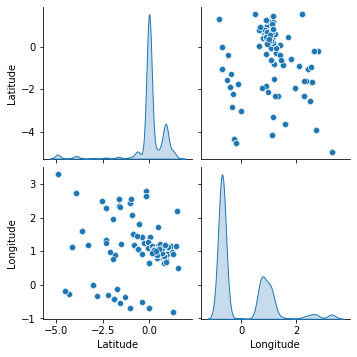

In [ ]:
sns.pairplot(df_lat_scaled[['Latitude','Longitude']],diag_kind='kde')

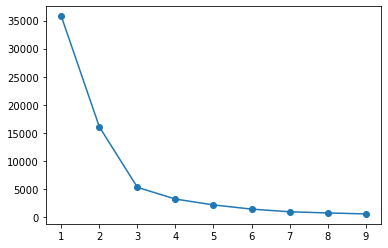

In [ ]:
df_lat=df_lat_scaled[['Latitude','Longitude']]
from sklearn.cluster import KMeans
error=[]
for i in range(1,10):
    kmodel=KMeans(n_clusters=i,random_state=0)
    kmodel.fit(df_lat)
    error.append(kmodel.inertia_)
plt.plot(range(1,10),error,marker='o')

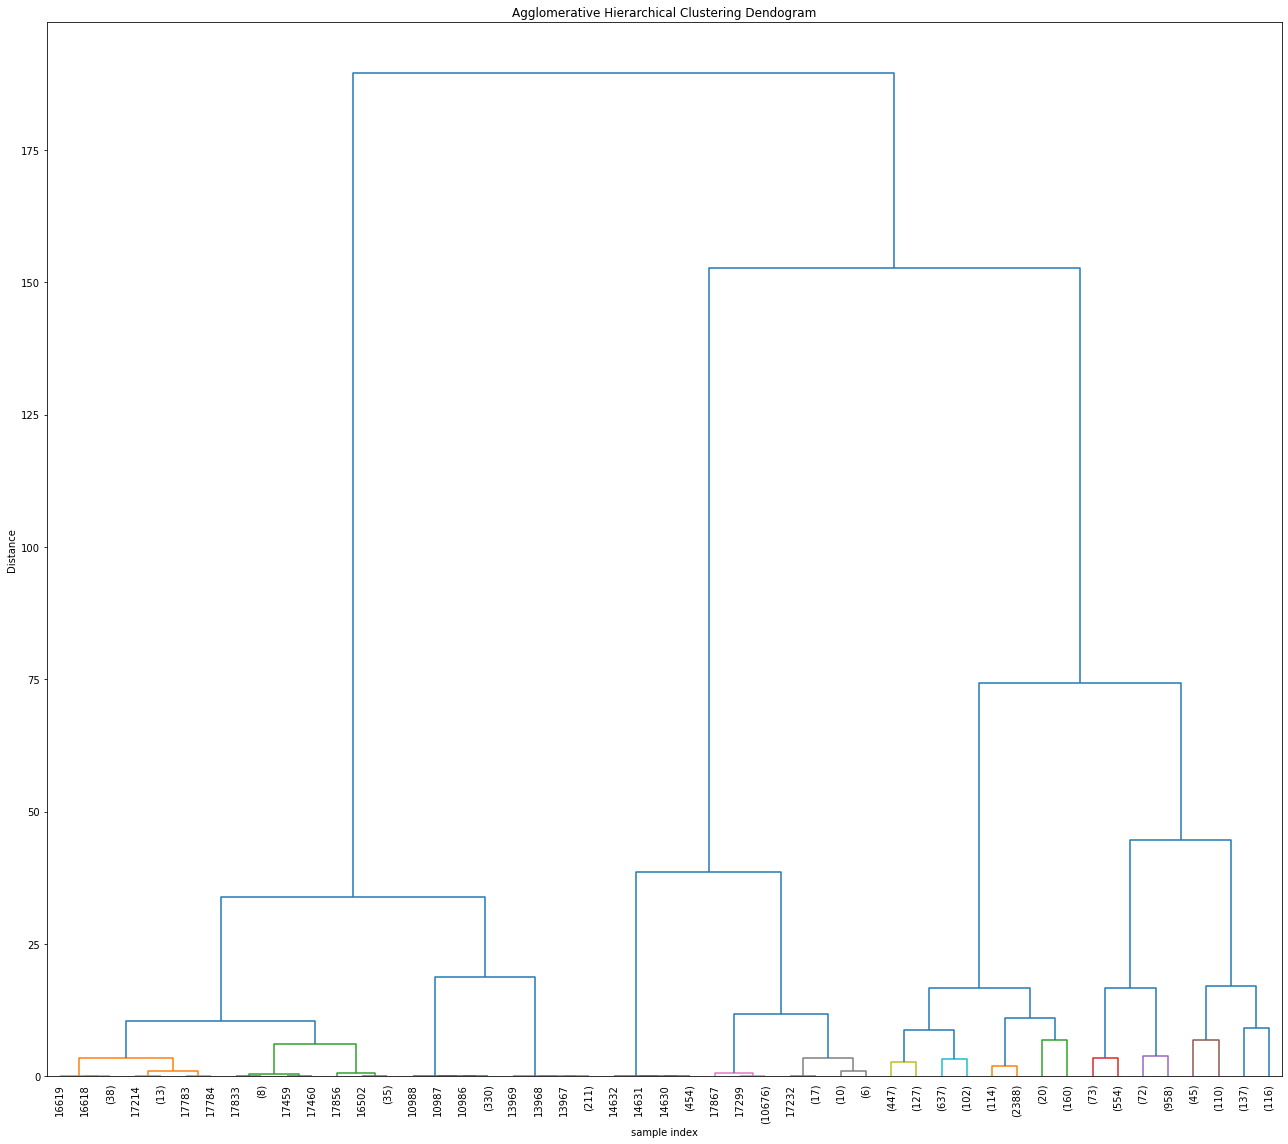

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_lat_scaled[['Latitude','Longitude']], 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

In [ ]:
kmodel=KMeans(n_clusters=3,random_state=0)
kmodel.fit(df_lat_scaled)
cluster_labels=kmodel.labels_

In [ ]:
df['clusters']=cluster_labels

### Dropping redundant columns

In [ ]:
df.drop(columns=['title','location','department','Country','State','Latitude','Longitude'],inplace=True)

In [ ]:
df.head()

salary_range                                    company_profile  \
0          NaN  We're Food52, and we've created a groundbreaki...   
1          NaN  Valor Services provides Workforce Solutions th...   
2          NaN  Our passion for improving quality of life thro...   
3          NaN  SpotSource Solutions LLC is a Global Human Cap...   
4          NaN                                                NaN   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Our client, located in Houston, is actively se...   
2  THE COMPANY: ESRI – Environmental Systems Rese...   
3  JOB TITLE: Itemization Review ManagerLOCATION:...   
4  Job OverviewApex is an environmental consultin...   

                                        requirements  \
0  Experience with content management systems a m...   
1  Implement pre-commissioning and commissioning ...   
2  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
3  QUALIFICATIONS:RN license in the State of Texa...   
4                                                NaN   

                                            benefits  telecommuting  \
0                                                NaN              0   
1                                                NaN              0   
2  Our culture is anything but corporate—we have ...              0   
3                              Full Benefits Offered              0   
4                                                NaN              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0             NaN                 NaN   
2                 1              0       Full-time    Mid-Senior level   
3                 1              1       Full-time    Mid-Senior level   
4                 0              0             NaN                 NaN   

  required_education                industry              function  \
0                NaN                     NaN             Marketing   
1                NaN                     NaN                   NaN   
2  Bachelor's Degree       Computer Software                 Sales   
3  Bachelor's Degree  Hospital & Health Care  Health Care Provider   
4                NaN                     NaN                   NaN   

   fraudulent  clusters  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0

### Treating Missing Values

In [ ]:
df.isnull().sum()

salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
clusters                   0
dtype: int64

In [32]:
df['employment_type'].fillna('Missing',inplace=True)
df['required_experience'].fillna('Missing',inplace=True)
df['required_education'].fillna('Missing',inplace=True)
df['industry'].fillna('Missing',inplace=True)
df['function'].fillna('Missing',inplace=True)

EDA

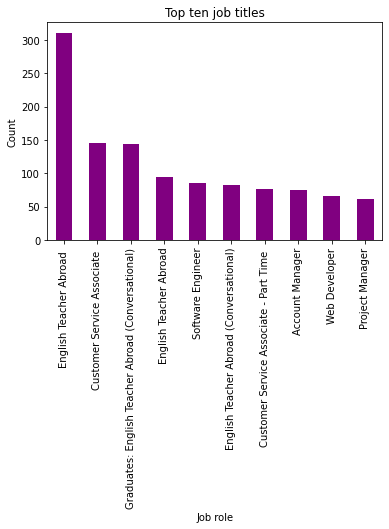

In [33]:
title = df['title'].value_counts()[:10]
title.plot(kind = 'bar', color = 'purple')
plt.title('Top ten job titles')
plt.xlabel('Job role')
plt.ylabel('Count')
plt.show()

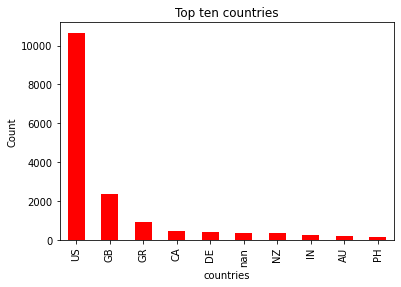

In [35]:
country = df['Country'].value_counts()[:10]
country.plot(kind = 'bar', color = 'red')
plt.title('Top ten countries')
plt.xlabel('countries')
plt.ylabel('Count')
plt.show()

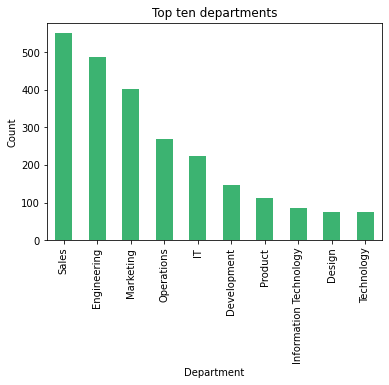

In [36]:
department = df['department'].value_counts()[:10]
department.plot(kind = 'bar', color = 'mediumseagreen')
plt.title('Top ten departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

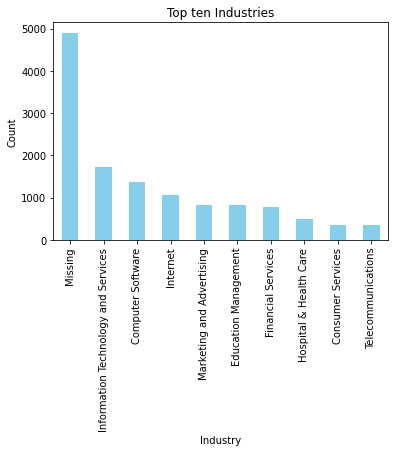

In [41]:
industry = df['industry'].value_counts()[:10]
industry.plot(kind = 'bar', color = 'skyblue')
plt.title('Top ten Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

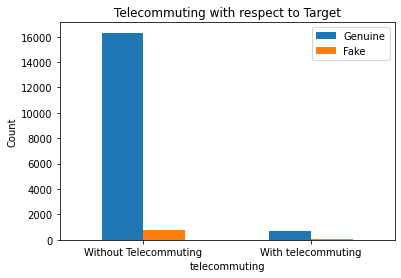

In [37]:
pd.crosstab(df['telecommuting'],df['fraudulent']).plot(kind='bar')
plt.title('Telecommuting with respect to Target')
plt.xticks([0,1],['Without Telecommuting','With telecommuting'],rotation=360)
plt.ylabel('Count')
plt.legend(['Genuine','Fake'])
plt.show()

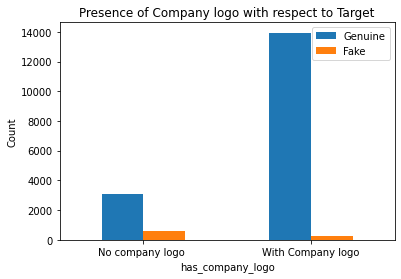

In [38]:
pd.crosstab(df['has_company_logo'],df['fraudulent']).plot(kind='bar')
plt.title('Presence of Company logo with respect to Target')
plt.xticks([0,1],['No company logo ','With Company logo'],rotation=360)
plt.ylabel('Count')
plt.legend(['Genuine','Fake'])
plt.show()

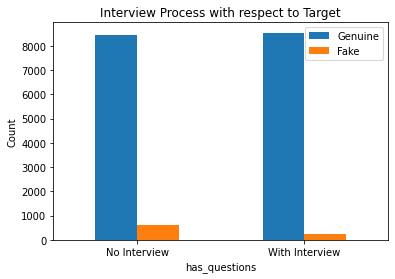

In [39]:
pd.crosstab(df['has_questions'],df['fraudulent']).plot(kind='bar')
plt.title('Interview Process with respect to Target')
plt.xticks([0,1],['No Interview','With Interview'],rotation=360)
plt.ylabel('Count')
plt.legend(['Genuine','Fake'])
plt.show()

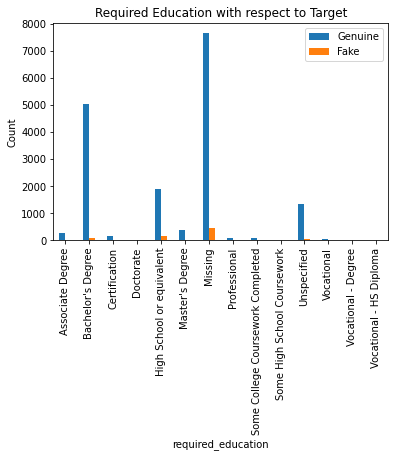

In [40]:
pd.crosstab(df['required_education'],df['fraudulent']).plot(kind='bar')
plt.title('Required Education with respect to Target')
#plt.xticks([0,1],['No Interview','With Interview'],rotation=360)
plt.ylabel('Count')
plt.legend(['Genuine','Fake'])
plt.show()

STATISTICAL ANALYSIS

In [42]:
ct = pd.crosstab(df['has_questions'], df['fraudulent'])
ct

fraudulent        0    1
has_questions           
0              8472  616
1              8542  250

In [43]:
from statsmodels.stats.proportion import proportions_ztest
z_val, p_value =proportions_ztest([8542, 250], [17014,866])
print(p_value)

1.6381972531336588e-34


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
ct = pd.crosstab(df['has_company_logo'], df['fraudulent'])
ct

fraudulent            0    1
has_company_logo            
0                  3077  583
1                 13937  283

In [45]:

z_val, p_value =proportions_ztest([583, 283], [3660,14520])
print(p_value)

7.82919940627386e-276


In [46]:
ct = pd.crosstab(df['telecommuting'], df['fraudulent'])
ct

fraudulent         0    1
telecommuting            
0              16311  802
1                703   64

In [47]:

z_val, p_value =proportions_ztest([802, 64], [17113,767])
print(p_value)

3.907078901429863e-06


### Handling NLP features

In [ ]:
message_cols=['company_profile','description','requirements','benefits']
df_message=df.copy()

In [ ]:
for i in message_cols:
    df_message.loc[df_message[i].isnull(),i]='Missing'

In [ ]:
df_message[message_cols].isnull().sum()

company_profile    0
description        0
requirements       0
benefits           0
dtype: int64

In [ ]:
df_message['message']=df_message['company_profile']+' '+df_message['description']+' '
+df_message['requirements']+' '+df_message['benefits']

0        Experience with content management systems a m...
1        Implement pre-commissioning and commissioning ...
2        EDUCATION: Bachelor’s or Master’s in GIS, busi...
3        QUALIFICATIONS:RN license in the State of Texa...
4                                          Missing Missing
5        Experience with CRM software, live chat, and p...
6        MUST BE A US CITIZEN.An active TS/SCI clearanc...
7        Minimum Requirements:Minimum of 6 months custo...
8        Position : #URL_86fd830a95a64e2b30ceed829e63fd...
9        Requirements:4 – 5 years’ experience in develo...
10       Valid driver's license,Somewhat Clean driving ...
11                                         Missing Missing
12       Must have 5 or more years of experience with D...
13       Job RequirementsAssist in creating client onli...
14       Job Requirements:A reputation as a "go-getter"...
15       JAVA, .NET, SQL, ORACLE, SAP, Informatica, Big...
16                                         Missing Missi

In [ ]:
df_message.drop(columns=message_cols,inplace=True)

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer=WordNetLemmatizer()
corpus=[]
for rows in range(len(df_message)):
        message=re.sub('[^a-zA-Z\d+]',' ',df_message['message'][rows])
        message=message.lower()
        message=message.split()
        message=[lemmatizer.lemmatize(word)  for word in message   if not word in stopwords.words('english')]
        message=' '.join(message)
        corpus.append(message)

In [ ]:
corpus

['food52 created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food52 named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food52 fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food52 content number partner site huffington post yahoo buzzfeed various content management systemsresearching 

### Count Vectorizer

In [ ]:
import numpy as np

In [ ]:
 #np.array(tfidf.transform(df[c]).toarray(), dtype=np.float16)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
x=np.array(cv.fit_transform(corpus).toarray(),dtype=np.float16) 
type(x)

numpy.ndarray

In [ ]:
x.dtype

dtype('float16')

In [ ]:
feature_names=cv.get_feature_names()
feature_names

['00',
 '000',
 '00am',
 '00pm',
 '01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a',
 '0e92123d11734167533acc44a2e74ffac0b6f56d256225a89769e0641a3d1aee',
 '0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae',
 '0in',
 '0pt',
 '10',
 '100',
 '1000',
 '100k',
 '11',
 '113b1bd5d3e5e087c3480c458e2ef299fd3a272612224463899e65ab2fe73995',
 '12',
 '120',
 '13',
 '14',
 '140',
 '15',
 '150',
 '1500',
 '16',
 '1600',
 '169ac3804e2da6e0514e5ef76c29f157f41d80451b486889d9aa',
 '17',
 '18',
 '180',
 '18234f381f5e7b9a9ffdc727cd05c9046edffb45bce85533c8f9b6d0216e925e',
 '1871',
 '18cc302f4e0f1dac521853b2a6ae109ebbe44c6130d31eb0413535ba71e2f42f',
 '1929',
 '1943',
 '1950',
 '1956',
 '1960',
 '1970',
 '1972',
 '1976',
 '1982',
 '1988',
 '1989',
 '1992',
 '1994',
 '1995',
 '1997',
 '1998',
 '1999',
 '1bdaa45fd1ec77ea7879abfceafd610ca4fa9b4eb30eb6fa5f39b9ffac8a8c5a',
 '1st',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009

In [ ]:
df_upd=pd.DataFrame(x,columns=cv.get_feature_names())

In [ ]:
df.head()

salary_range                                    company_profile  \
0          NaN  We're Food52, and we've created a groundbreaki...   
1          NaN  Valor Services provides Workforce Solutions th...   
2          NaN  Our passion for improving quality of life thro...   
3          NaN  SpotSource Solutions LLC is a Global Human Cap...   
4          NaN                                                NaN   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Our client, located in Houston, is actively se...   
2  THE COMPANY: ESRI – Environmental Systems Rese...   
3  JOB TITLE: Itemization Review ManagerLOCATION:...   
4  Job OverviewApex is an environmental consultin...   

                                        requirements  \
0  Experience with content management systems a m...   
1  Implement pre-commissioning and commissioning ...   
2  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
3  QUALIFICATIONS:RN license in the State of Texa...   
4                                                NaN   

                                            benefits  telecommuting  \
0                                                NaN              0   
1                                                NaN              0   
2  Our culture is anything but corporate—we have ...              0   
3                              Full Benefits Offered              0   
4                                                NaN              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0         Missing             Missing   
2                 1              0       Full-time    Mid-Senior level   
3                 1              1       Full-time    Mid-Senior level   
4                 0              0         Missing             Missing   

  required_education                industry              function  \
0            Missing                 Missing             Marketing   
1            Missing                 Missing               Missing   
2  Bachelor's Degree       Computer Software                 Sales   
3  Bachelor's Degree  Hospital & Health Care  Health Care Provider   
4            Missing                 Missing               Missing   

   fraudulent  clusters  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0

In [ ]:
df.drop(columns=['salary_range','company_profile','description','requirements','benefits'],inplace=True)

In [ ]:
df_fr=df.drop(columns=['fraudulent'])

### One Hot Encoding

In [ ]:
df_encoded=pd.get_dummies(df_fr,drop_first=True)

In [ ]:
df_model=pd.concat((df_encoded,df_upd),axis=1)

In [ ]:
df_model.shape

(17880, 5197)

In [ ]:
df_model.head()

telecommuting  has_company_logo  has_questions  clusters  \
0              0                 1              0         0   
1              0                 1              0         0   
2              0                 1              0         0   
3              0                 1              1         0   
4              0                 0              0         0   

   employment_type_Full-time  employment_type_Missing  employment_type_Other  \
0                          0                        0                      1   
1                          0                        1                      0   
2                          1                        0                      0   
3                          1                        0                      0   
4                          0                        1                      0   

   employment_type_Part-time  employment_type_Temporary  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   required_experience_Director  required_experience_Entry level  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   required_experience_Executive  required_experience_Internship  \
0                              0                               1   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   required_experience_Mid-Senior level  required_experience_Missing  \
0                                     0                            0   
1                                     0                            1   
2                                     1                            0   
3                                     1                            0   
4                                     0                            1   

   required_experience_Not Applicable  required_education_Bachelor's Degree  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     1   
3                                   0                                     1   
4                                   0                                     0   

   required_education_Certification  required_education_Doctorate  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   

   required_education_High School or equivalent  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   required_education_Master's Degree  required_education_Missing  \
0                                   0                           1   
1                                   0                           1   
2                                   0                           0   
3                                   0                           

### Model Building

In [ ]:
y=df['fraudulent']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df_model,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [ ]:
nb.fit(xtrain,ytrain)
ypredtest=nb.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(ytest,ypredtest)

0.915268456375839

In [ ]:
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

[[3136  280]
 [  23  137]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3416
           1       0.33      0.86      0.47       160

    accuracy                           0.92      3576
   macro avg       0.66      0.89      0.71      3576
weighted avg       0.96      0.92      0.93      3576



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(xtrain,ytrain)
ypredtest=RF.predict(xtest)

In [ ]:
accuracy_score(ytest,ypredtest)

0.9860178970917226

In [ ]:
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

[[3415    1]
 [  49  111]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3416
           1       0.99      0.69      0.82       160

    accuracy                           0.99      3576
   macro avg       0.99      0.85      0.90      3576
weighted avg       0.99      0.99      0.98      3576



### TF-IDF Vectorizer:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(stop_words='english',max_features=5000)
x2= np.array(tfv.fit_transform(corpus).toarray(),dtype=np.float16)
type(x2)

numpy.ndarray

In [ ]:
feature_names=tfv.get_feature_names()
#feature_names

In [ ]:
x2.shape

(17880, 5000)

In [ ]:
df_upd1=pd.DataFrame(x2,columns=tfv.get_feature_names())

In [ ]:
df_model_tfv=pd.concat((df_encoded,df_upd1),axis=1)

In [ ]:
df_model_tfv.shape

(17880, 5197)

In [ ]:
y=df['fraudulent']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df_model_tfv,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
ypredtest=nb.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(ytest,ypredtest)

0.9697986577181208

In [ ]:
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

[[3397   19]
 [  89   71]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3416
           1       0.79      0.44      0.57       160

    accuracy                           0.97      3576
   macro avg       0.88      0.72      0.78      3576
weighted avg       0.97      0.97      0.97      3576



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(xtrain,ytrain)
ypredtest=RF.predict(xtest)

In [ ]:
accuracy_score(ytest,ypredtest)

0.985178970917226

In [ ]:
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

[[3415    1]
 [  52  108]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3416
           1       0.99      0.68      0.80       160

    accuracy                           0.99      3576
   macro avg       0.99      0.84      0.90      3576
weighted avg       0.99      0.99      0.98      3576



In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3416
           1       0.92      0.74      0.82       160

    accuracy                           0.99      3576
   macro avg       0.95      0.87      0.91      3576
weighted avg       0.98      0.99      0.98      3576



### Feature Selection using SelectKBest:

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
skb=SelectKBest(f_classif,k=200)
skb.fit_transform(df_model_tfv,y)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.09234619, 0.        ,
        0.11523438],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.06652832, 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
skb_feat=pd.DataFrame()
skb_feat['Features']=df_model_tfv.columns
skb_feat['P-values']=skb.pvalues_
skb_feat.head()

Features       P-values
0              telecommuting   3.887303e-06
1           has_company_logo  2.213970e-278
2              has_questions   1.203555e-34
3                   clusters   1.307157e-53
4  employment_type_Full-time   1.046179e-07

In [ ]:
#best_features=
best_features=skb_feat[skb_feat['P-values']>0.05]['Features']

In [ ]:
X_new=df_model_tfv[best_features]
X_new.shape

(17880, 3129)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_new,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
ypredtest=nb.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(ytest,ypredtest)

0.9552572706935123

In [ ]:
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

[[3416    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3416
           1       0.00      0.00      0.00       160

    accuracy                           0.96      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.91      0.96      0.93      3576



C:\Users\aarth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3416
           1       0.94      0.53      0.67       160

    accuracy                           0.98      3576
   macro avg       0.96      0.76      0.83      3576
weighted avg       0.98      0.98      0.97      3576



### PCA Implmentation:

In [ ]:
from sklearn.decomposition import PCA
model=PCA(n_components=300)
pca_model=model.fit_transform(df_model_tfv)

In [ ]:
#model.explained_variance_ratio_

In [ ]:
ratio=sorted(model.explained_variance_ratio_*100,reverse=True)
np.cumsum(ratio)   # nearly 92% explained variance

array([17.73769211, 24.39403592, 30.17620594, 35.34297245, 39.19285315,
       42.27441563, 45.0590459 , 47.36975263, 49.57144294, 51.65760686,
       53.59037655, 55.23982119, 56.74710392, 58.19834423, 59.59761258,
       60.9109615 , 62.00662409, 63.04658197, 64.05769698, 65.01232658,
       65.94580797, 66.78648216, 67.59127238, 68.34454695, 69.05814771,
       69.7111998 , 70.26816263, 70.79940554, 71.30798644, 71.75178579,
       72.14371203, 72.51867805, 72.89142084, 73.24399448, 73.57649464,
       73.8815273 , 74.18212379, 74.46555143, 74.74008232, 75.00667776,
       75.26013436, 75.51109942, 75.74635533, 75.97842123, 76.20335664,
       76.41729279, 76.62609343, 76.82376665, 77.01903531, 77.20593126,
       77.38461916, 77.56024065, 77.73510459, 77.89792155, 78.05258764,
       78.20106447, 78.34648628, 78.48842305, 78.62923602, 78.76768708,
       78.90527313, 79.04147631, 79.17619592, 79.30875603, 79.43824374,
       79.56647338, 79.69241102, 79.81734074, 79.9411974 , 80.06

#### Model building:

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(pca_model,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(xtrain,ytrain)
ypredtest=RF.predict(xtest)
print(accuracy_score(ytest,ypredtest))
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

0.9804250559284117
[[3415    1]
 [  69   91]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3416
           1       0.99      0.57      0.72       160

    accuracy                           0.98      3576
   macro avg       0.98      0.78      0.86      3576
weighted avg       0.98      0.98      0.98      3576



In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3416
           1       0.96      0.66      0.79       160

    accuracy                           0.98      3576
   macro avg       0.97      0.83      0.89      3576
weighted avg       0.98      0.98      0.98      3576



### Handling Data Imbalance:(over-sampling and under-sampling) using Smote and Nearmiss:

In [ ]:
class0=10000
class1=5000
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
pipe=make_pipeline(
SMOTE(sampling_strategy={1:class1}),
NearMiss(sampling_strategy={0:class0})
)

In [ ]:
xbal,ybal=pipe.fit_resample(df_model_tfv,y)
xbal.shape,ybal.shape

((15000, 5197), (15000,))

#### Model Building:

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xbal,ybal,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
ypredtest=nb.predict(xtest)
print(accuracy_score(ytest,ypredtest))
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

0.9353333333333333
[[1893   97]
 [  97  913]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1990
           1       0.90      0.90      0.90      1010

    accuracy                           0.94      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.94      0.94      0.94      3000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(xtrain,ytrain)
ypredtest=RF.predict(xtest)
print(accuracy_score(ytest,ypredtest))
print(confusion_matrix(ytest,ypredtest))
print(classification_report(ytest,ypredtest))

0.9913333333333333
[[1988    2]
 [  24  986]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1990
           1       1.00      0.98      0.99      1010

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.99      0.98      0.98      1010

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(xtrain,ytrain)
y_pred_adb=adb.predict(xtest)
print(accuracy_score(ytest,y_pred_adb))
print(confusion_matrix(ytest,y_pred_adb))
print(classification_report(ytest,y_pred_adb))

0.9373333333333334
[[1916   74]
 [ 114  896]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1990
           1       0.92      0.89      0.91      1010

    accuracy                           0.94      3000
   macro avg       0.93      0.92      0.93      3000
weighted avg       0.94      0.94      0.94      3000



In [ ]:
from sklearn.decomposition import PCA
model=PCA(n_components=300)
pca_model=model.fit_transform(xbal)

In [ ]:
#model.explained_variance_ratio_

In [ ]:
ratio=sorted(model.explained_variance_ratio_*100,reverse=True)
np.cumsum(ratio)[-1]   # nearly 90% explained variance

91.39647986620784

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(pca_model,ybal,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(xtrain,ytrain)
y_pred_rf=RF.predict(xtest)
print(accuracy_score(ytest,y_pred_rf))
print(confusion_matrix(ytest,y_pred_rf))
print(classification_report(ytest,y_pred_rf))

0.9816666666666667
[[1987    3]
 [  52  958]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1990
           1       1.00      0.95      0.97      1010

    accuracy                           0.98      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(xtrain,ytrain)
y_pred_adb=adb.predict(xtest)
print(accuracy_score(ytest,y_pred_adb))
print(confusion_matrix(ytest,y_pred_adb))
print(classification_report(ytest,y_pred_adb))

0.9023333333333333
[[1870  120]
 [ 173  837]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1990
           1       0.87      0.83      0.85      1010

    accuracy                           0.90      3000
   macro avg       0.89      0.88      0.89      3000
weighted avg       0.90      0.90      0.90      3000



In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
y_pred_xgb=xgboost.predict(xtest)
print(accuracy_score(ytest,y_pred_xgb))
print(confusion_matrix(ytest,y_pred_xgb))
print(classification_report(ytest,y_pred_xgb))

0.9853333333333333
[[1976   14]
 [  30  980]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.99      0.97      0.98      1010

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred_svc = svc.predict(xtest)
print(accuracy_score(ytest,y_pred_svc))
print(confusion_matrix(ytest,y_pred_svc))
print(classification_report(ytest,y_pred_svc))

0.9743333333333334
[[1959   31]
 [  46  964]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1990
           1       0.97      0.95      0.96      1010

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



### Models Comparison Table:

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'RF': y_pred_rf, 'AdaBoost': y_pred_adb, 'XGB': y_pred_xgb ,'SVC': y_pred_svc}

for key in predictions:
    fpr, tpr, _ = roc_curve(ytest, predictions[key])
    auc = roc_auc_score(ytest, predictions[key])
    acc = accuracy_score(ytest,predictions[key])
    
    results_table = results_table.append({'models': key,
                                         #'fpr' : fpr[1],
                                         'recall score' : tpr[1],
                                         'auc' : auc,
                                         'accuracy' : acc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)
#print(pd.DataFrame(results_table))


In [ ]:
models = pd.DataFrame(results_table)
models.drop('tpr',axis=1)
models.drop(['fpr','tpr'],axis=1)

auc  accuracy  recall score
models                                    
RF        0.973504  0.981667      0.948515
AdaBoost  0.884206  0.902333      0.828713
XGB       0.981631  0.985333      0.970297
SVC       0.969439  0.974333      0.954455

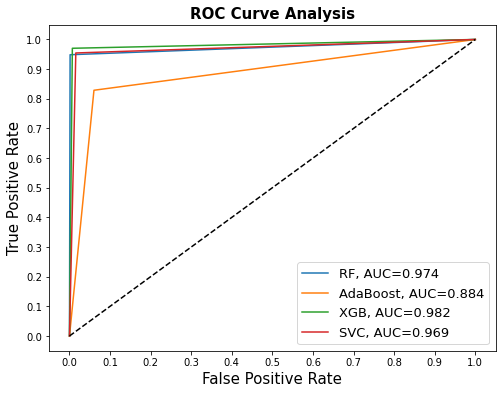

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'RF': y_pred_rf, 'AdaBoost': y_pred_adb, 'XGB': y_pred_xgb ,'SVC': y_pred_svc}

for key in predictions:
    fpr, tpr, _ = roc_curve(ytest, predictions[key])
    auc = roc_auc_score(ytest, predictions[key])
    
    results_table = results_table.append({'models': key,
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

#print(results_table)
fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()